<a href="https://colab.research.google.com/github/c-biancone/ISCH-370_Project/blob/main/ISCH370_Group2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import datasets

In [ ]:
# mount drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# import DoT county transportation profiles (Stored in GitHub repo)
import pandas as pd
countyTrans = pd.read_csv('https://raw.githubusercontent.com/c-biancone/ISCH-370_Project/main/data_sets/county_transportation_profiles.csv')

# import DoT trips by distance
# not right now don't want to slow this down too much

# import census data
census = pd.read_csv('https://raw.githubusercontent.com/c-biancone/ISCH-370_Project/main/data_sets/acs2015_county_data.csv')

In [ ]:
# check out the dataset
# countyTrans

In [ ]:
countyTrans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3142 entries, 0 to 3141
Data columns (total 22 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   County FIPS                                                              3142 non-null   int64  
 1   County Name                                                              3142 non-null   object 
 2   State FIPS                                                               3142 non-null   int64  
 3   State Name                                                               3142 non-null   object 
 4   Primary and Commercial Airports                                          3017 non-null   float64
 5   Non-Commercial -Civil Public Use Airports and Seaplane base              3017 non-null   float64
 6   Non-Commercial -Other Aerodromes                                        

In [ ]:
# see how many null values there are in which column
countyTrans.isnull().sum()

County FIPS                                                                   0
County Name                                                                   0
State FIPS                                                                    0
State Name                                                                    0
Primary and Commercial Airports                                             125
Non-Commercial -Civil Public Use Airports and Seaplane base                 125
Non-Commercial -Other Aerodromes                                            125
Number of Bridges                                                            18
% of Poor Condition Bridges                                                  18
Number of business establishments                                             2
Percent of resident workers who commute by transit                            0
Number of resident workers who work at home                                   3
Number of workers from other counties wh

In [ ]:
countyTransCleaned = countyTrans.copy()
# docks and marinas have huge number of null values and aren't relevant
countyTransCleaned.drop(['Total Docks','Total Marinas','Primary and Commercial Airports', \
                         'Non-Commercial -Civil Public Use Airports and Seaplane base','Non-Commercial -Other Aerodromes', \
                         'Route miles of freight railroad', 'Route miles of passenger railroad and rail transit'], axis=1, inplace=True)
# assume airports, bridges, railroad null values are counties without these since the catergories have same number missing
#countyTransCleaned['Primary and Commercial Airports'].fillna(0, inplace=True)
#countyTransCleaned['Non-Commercial -Civil Public Use Airports and Seaplane base'].fillna(0, inplace=True)
#countyTransCleaned['Non-Commercial -Other Aerodromes'].fillna(0, inplace=True)
countyTransCleaned['Number of Bridges'].fillna(0, inplace=True)
countyTransCleaned['% of Poor Condition Bridges'].fillna(0.0, inplace=True)
countyTransCleaned['% of Medium to Fair Condition Bridges'].fillna(1.0, inplace=True) # no bridges = fine condition
#countyTransCleaned['Route miles of freight railroad'].fillna(0.0, inplace=True)
#countyTransCleaned['Route miles of passenger railroad and rail transit'].fillna(0.0, inplace=True)

# countyTransCleaned.isnull().sum()

In [ ]:
# let's look at the null values for businesses and wfh
temp = pd.DataFrame(columns = countyTransCleaned.columns)
for i in range(countyTransCleaned.shape[0]-1):
    row = countyTransCleaned.loc[i]
    if row.isnull().any():
        temp = temp.append(row)
# temp

In [ ]:
# the counties above are small, low in population, so assuming businesses and wfh = 0
countyTransCleaned['Number of business establishments'].fillna(0, inplace=True)
countyTransCleaned['Number of resident workers who work at home'].fillna(0, inplace=True)

In [ ]:
countyTransCleaned

,County FIPS,County Name,State FIPS,State Name,Number of Bridges,% of Poor Condition Bridges,Number of business establishments,Percent of resident workers who commute by transit,Number of resident workers who work at home,Number of workers from other counties who commute to work in the county,Number of resident workers who commute to work in other counties,Number of resident workers who commute within county,Number of resident workers,Number of residents,% of Medium to Fair Condition Bridges
0,1001,Autauga County,1,Alabama,114.0,0.035088,869.0,0.000782,510.0,15576,15417,8710,24300,55050,0.964912
1,1003,Baldwin County,1,Alabama,360.0,0.019444,5384.0,0.002143,4380.0,24011,17748,62235,86310,199510,0.980556
2,1005,Barbour County,1,Alabama,193.0,0.031088,455.0,0.003984,110.0,2368,1871,6395,8785,26615,0.968912
3,1007,Bibb County,1,Alabama,126.0,0.000000,284.0,0.004710,100.0,4868,4816,3410,8280,22570,1.000000
4,1009,Blount County,1,Alabama,183.0,0.087432,698.0,0.001639,480.0,14171,13981,7205,21350,57705,0.912568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,Sweetwater County,56,Wyoming,195.0,0.071795,1248.0,0.023457,400.0,740,469,21855,22595,44810,0.928205
3138,56039,Teton County,56,Wyoming,117.0,0.136752,2140.0,0.062455,790.0,775,360,13220,14010,22625,0.863248
3139,56041,Uinta County,56,Wyoming,132.0,0.181818,560.0,0.034264,280.0,1632,1093,7685,9310,20895,0.818182
3140,56043,Washakie County,56,Wyoming,61.0,0.114754,346.0,0.001099,185.0,339,300,3300,3640,8350,0.885246


In [ ]:
census

,CensusId,State,County,TotalPop,Men,Women,Hispanic,White,Black,Native,...,Walk,OtherTransp,WorkAtHome,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,26745,28476,2.6,75.8,18.5,0.4,...,0.5,1.3,1.8,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,95314,99807,4.5,83.1,9.5,0.6,...,1.0,1.4,3.9,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,14497,12435,4.6,46.2,46.7,0.2,...,1.8,1.5,1.6,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,12073,10531,2.2,74.5,21.4,0.4,...,0.6,1.5,0.7,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,28512,29198,8.6,87.9,1.5,0.3,...,0.9,0.4,2.3,34.9,22189,82.0,13.5,4.2,0.4,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,72145,Puerto Rico,Vega Baja,56858,27379,29479,96.4,3.4,0.1,0.0,...,1.2,1.3,0.3,32.0,13660,78.3,17.6,4.1,0.0,15.2
3216,72147,Puerto Rico,Vieques,9130,4585,4545,96.7,2.9,0.0,0.0,...,10.8,0.0,1.4,14.0,2860,44.5,41.6,13.6,0.3,12.2
3217,72149,Puerto Rico,Villalba,24685,12086,12599,99.7,0.0,0.0,0.0,...,3.2,0.0,3.3,26.9,6795,59.2,27.5,13.1,0.2,25.9
3218,72151,Puerto Rico,Yabucoa,36279,17648,18631,99.8,0.2,0.0,0.0,...,2.3,2.3,1.5,29.5,8083,65.1,27.6,7.3,0.0,24.3


In [ ]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3220 entries, 0 to 3219
Data columns (total 37 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CensusId         3220 non-null   int64  
 1   State            3220 non-null   object 
 2   County           3220 non-null   object 
 3   TotalPop         3220 non-null   int64  
 4   Men              3220 non-null   int64  
 5   Women            3220 non-null   int64  
 6   Hispanic         3220 non-null   float64
 7   White            3220 non-null   float64
 8   Black            3220 non-null   float64
 9   Native           3220 non-null   float64
 10  Asian            3220 non-null   float64
 11  Pacific          3220 non-null   float64
 12  Citizen          3220 non-null   int64  
 13  Income           3219 non-null   float64
 14  IncomeErr        3219 non-null   float64
 15  IncomePerCap     3220 non-null   int64  
 16  IncomePerCapErr  3220 non-null   int64  
 17  Poverty       

In [ ]:
census.isnull().sum()

CensusId           0
State              0
County             0
TotalPop           0
Men                0
Women              0
Hispanic           0
White              0
Black              0
Native             0
Asian              0
Pacific            0
Citizen            0
Income             1
IncomeErr          1
IncomePerCap       0
IncomePerCapErr    0
Poverty            0
ChildPoverty       1
Professional       0
Service            0
Office             0
Construction       0
Production         0
Drive              0
Carpool            0
Transit            0
Walk               0
OtherTransp        0
WorkAtHome         0
MeanCommute        0
Employed           0
PrivateWork        0
PublicWork         0
SelfEmployed       0
FamilyWork         0
Unemployment       0
dtype: int64

In [ ]:
unwanted = ['Men', 'Women', 'Hispanic','White','Black','Native','Asian','Pacific','Citizen','IncomeErr',
            'IncomePerCapErr','ChildPoverty','Professional','Service','Office','Construction','Production','WorkAtHome']
census.drop(columns = unwanted, inplace = True)
census

,CensusId,State,County,TotalPop,Income,IncomePerCap,Poverty,Drive,Carpool,Transit,Walk,OtherTransp,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,51281.0,24974,12.9,87.5,8.8,0.1,0.5,1.3,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,50254.0,27317,13.4,84.7,8.8,0.1,1.0,1.4,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,32964.0,16824,26.7,83.8,10.9,0.4,1.8,1.5,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,38678.0,18431,16.8,83.2,13.5,0.5,0.6,1.5,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,45813.0,20532,16.7,84.9,11.2,0.4,0.9,0.4,34.9,22189,82.0,13.5,4.2,0.4,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3215,72145,Puerto Rico,Vega Baja,56858,16948.0,9102,48.5,89.1,7.1,0.9,1.2,1.3,32.0,13660,78.3,17.6,4.1,0.0,15.2
3216,72147,Puerto Rico,Vieques,9130,18104.0,8821,39.1,69.1,17.8,1.0,10.8,0.0,14.0,2860,44.5,41.6,13.6,0.3,12.2
3217,72149,Puerto Rico,Villalba,24685,17818.0,8420,54.0,82.0,11.4,0.1,3.2,0.0,26.9,6795,59.2,27.5,13.1,0.2,25.9
3218,72151,Puerto Rico,Yabucoa,36279,15627.0,7960,52.3,86.0,7.9,0.0,2.3,2.3,29.5,8083,65.1,27.6,7.3,0.0,24.3


In [ ]:
census['State'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Indiana',
       'Iowa', 'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Carolina',
       'North Dakota', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming', 'Puerto Rico'],
      dtype=object)

In [ ]:
len(census['State'].unique())

52

In [ ]:
countyTransCleaned['State Name'].unique()

array(['Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California',
       'Colorado', 'Connecticut', 'Delaware', 'District of Columbia',
       'Florida', 'Georgia', 'Hawaii', 'Idaho', 'Illinois', 'Kentucky',
       'Indiana', 'Iowa', 'Kansas', 'Louisiana', 'Maine', 'Maryland',
       'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi',
       'Missouri', 'Montana', 'Nebraska', 'Nevada', 'New Hampshire',
       'New Jersey', 'New Mexico', 'New York', 'North Dakota',
       'North Carolina', 'Ohio', 'Oklahoma', 'Oregon', 'Pennsylvania',
       'Rhode Island', 'South Carolina', 'South Dakota', 'Tennessee',
       'Texas', 'Utah', 'Vermont', 'Virginia', 'Washington',
       'West Virginia', 'Wisconsin', 'Wyoming'], dtype=object)

In [ ]:
len(countyTransCleaned['State Name'].unique())

51

In [ ]:
# get rid of puerto rico :(
census = census.loc[(census['State'] != 'Puerto Rico')]
census
# same size!!

,CensusId,State,County,TotalPop,Income,IncomePerCap,Poverty,Drive,Carpool,Transit,Walk,OtherTransp,MeanCommute,Employed,PrivateWork,PublicWork,SelfEmployed,FamilyWork,Unemployment
0,1001,Alabama,Autauga,55221,51281.0,24974,12.9,87.5,8.8,0.1,0.5,1.3,26.5,23986,73.6,20.9,5.5,0.0,7.6
1,1003,Alabama,Baldwin,195121,50254.0,27317,13.4,84.7,8.8,0.1,1.0,1.4,26.4,85953,81.5,12.3,5.8,0.4,7.5
2,1005,Alabama,Barbour,26932,32964.0,16824,26.7,83.8,10.9,0.4,1.8,1.5,24.1,8597,71.8,20.8,7.3,0.1,17.6
3,1007,Alabama,Bibb,22604,38678.0,18431,16.8,83.2,13.5,0.5,0.6,1.5,28.8,8294,76.8,16.1,6.7,0.4,8.3
4,1009,Alabama,Blount,57710,45813.0,20532,16.7,84.9,11.2,0.4,0.9,0.4,34.9,22189,82.0,13.5,4.2,0.4,7.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,Wyoming,Sweetwater,44772,69022.0,30568,11.5,77.2,15.4,2.4,2.4,0.9,21.0,23010,78.6,17.7,3.7,0.0,5.4
3138,56039,Wyoming,Teton,22311,75325.0,44231,7.4,64.0,7.5,7.8,10.3,4.9,14.4,14298,81.3,11.2,7.5,0.0,2.6
3139,56041,Wyoming,Uinta,20930,56569.0,25772,13.7,77.1,12.7,2.8,2.8,1.6,20.4,10064,75.4,19.0,5.6,0.0,4.4
3140,56043,Wyoming,Washakie,8400,47652.0,27394,13.8,74.1,12.3,0.0,6.2,2.8,12.3,3892,70.5,21.5,7.6,0.5,6.8


In [ ]:
# append data to original set
wanted = ['TotalPop','Income','IncomePerCap','Poverty','Drive','Carpool','Transit','Walk',"OtherTransp"] # may add on to this
for i in range(1,len(wanted)):
    countyTransCleaned = countyTransCleaned.join(census[wanted[i]])
countyTransCleaned

,County FIPS,County Name,State FIPS,State Name,Number of Bridges,% of Poor Condition Bridges,Number of business establishments,Percent of resident workers who commute by transit,Number of resident workers who work at home,Number of workers from other counties who commute to work in the county,...,Number of residents,% of Medium to Fair Condition Bridges,Income,IncomePerCap,Poverty,Drive,Carpool,Transit,Walk,OtherTransp
0,1001,Autauga County,1,Alabama,114.0,0.035088,869.0,0.000782,510.0,15576,...,55050,0.964912,51281.0,24974,12.9,87.5,8.8,0.1,0.5,1.3
1,1003,Baldwin County,1,Alabama,360.0,0.019444,5384.0,0.002143,4380.0,24011,...,199510,0.980556,50254.0,27317,13.4,84.7,8.8,0.1,1.0,1.4
2,1005,Barbour County,1,Alabama,193.0,0.031088,455.0,0.003984,110.0,2368,...,26615,0.968912,32964.0,16824,26.7,83.8,10.9,0.4,1.8,1.5
3,1007,Bibb County,1,Alabama,126.0,0.000000,284.0,0.004710,100.0,4868,...,22570,1.000000,38678.0,18431,16.8,83.2,13.5,0.5,0.6,1.5
4,1009,Blount County,1,Alabama,183.0,0.087432,698.0,0.001639,480.0,14171,...,57705,0.912568,45813.0,20532,16.7,84.9,11.2,0.4,0.9,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,Sweetwater County,56,Wyoming,195.0,0.071795,1248.0,0.023457,400.0,740,...,44810,0.928205,69022.0,30568,11.5,77.2,15.4,2.4,2.4,0.9
3138,56039,Teton County,56,Wyoming,117.0,0.136752,2140.0,0.062455,790.0,775,...,22625,0.863248,75325.0,44231,7.4,64.0,7.5,7.8,10.3,4.9
3139,56041,Uinta County,56,Wyoming,132.0,0.181818,560.0,0.034264,280.0,1632,...,20895,0.818182,56569.0,25772,13.7,77.1,12.7,2.8,2.8,1.6
3140,56043,Washakie County,56,Wyoming,61.0,0.114754,346.0,0.001099,185.0,339,...,8350,0.885246,47652.0,27394,13.8,74.1,12.3,0.0,6.2,2.8


In [ ]:
# query: counties whose commute is over 90% driving
countyTransCleaned.query("Drive > 90")

,County FIPS,County Name,State FIPS,State Name,Number of Bridges,% of Poor Condition Bridges,Number of business establishments,Percent of resident workers who commute by transit,Number of resident workers who work at home,Number of workers from other counties who commute to work in the county,...,Number of residents,% of Medium to Fair Condition Bridges,Income,IncomePerCap,Poverty,Drive,Carpool,Transit,Walk,OtherTransp
16,1033,Colbert County,1,Alabama,175.0,0.011429,1217.0,0.001156,345.0,7543,...,54375,0.988571,40576.0,22546,17.4,90.7,6.0,0.2,0.9,0.7
17,1035,Conecuh County,1,Alabama,226.0,0.084071,196.0,0.000000,60.0,1544,...,12695,0.915929,24900.0,15968,33.8,93.6,4.3,0.0,0.6,0.3
26,1053,Escambia County,1,Alabama,196.0,0.035714,752.0,0.003409,110.0,2625,...,37875,0.964286,32330.0,17045,24.2,90.8,6.0,0.4,1.2,0.5
538,13307,Webster County,13,Georgia,26.0,0.038462,30.0,0.000000,0.0,722,...,2670,0.961538,37063.0,18767,22.5,92.3,3.0,0.0,2.3,1.9
539,13309,Wheeler County,13,Georgia,54.0,0.055556,63.0,0.000000,40.0,706,...,7930,0.944444,27620.0,8292,27.2,92.6,2.3,0.0,2.6,0.7
1405,28009,Benton County,28,Mississippi,106.0,0.113208,57.0,0.000000,60.0,2237,...,8380,0.886792,33141.0,19935,21.0,91.6,6.2,0.0,0.5,0.0
1408,28015,Carroll County,28,Mississippi,233.0,0.163090,129.0,0.005376,45.0,2987,...,10300,0.836910,37289.0,20627,20.6,91.4,5.0,0.3,2.1,1.0
1911,37041,Chowan County,37,North Carolina,38.0,0.052632,346.0,0.000000,230.0,2468,...,14555,0.947368,37076.0,22106,21.1,92.9,3.7,0.0,0.8,0.2
2476,47097,Lauderdale County,47,Tennessee,266.0,0.063910,295.0,0.006218,75.0,2982,...,27260,0.936090,30281.0,15769,26.7,90.2,6.0,0.1,1.8,0.6
2534,48023,Baylor County,48,Texas,61.0,0.049180,104.0,0.000000,20.0,179,...,3640,0.950820,36373.0,32907,11.9,91.3,5.6,0.0,0.5,1.2


In [ ]:
# query: counties where commuting by walking is greater than commuting by transit (by percent)
countyTransCleaned.query("Walk > Transit")

,County FIPS,County Name,State FIPS,State Name,Number of Bridges,% of Poor Condition Bridges,Number of business establishments,Percent of resident workers who commute by transit,Number of resident workers who work at home,Number of workers from other counties who commute to work in the county,...,Number of residents,% of Medium to Fair Condition Bridges,Income,IncomePerCap,Poverty,Drive,Carpool,Transit,Walk,OtherTransp
0,1001,Autauga County,1,Alabama,114.0,0.035088,869.0,0.000782,510.0,15576,...,55050,0.964912,51281.0,24974,12.9,87.5,8.8,0.1,0.5,1.3
1,1003,Baldwin County,1,Alabama,360.0,0.019444,5384.0,0.002143,4380.0,24011,...,199510,0.980556,50254.0,27317,13.4,84.7,8.8,0.1,1.0,1.4
2,1005,Barbour County,1,Alabama,193.0,0.031088,455.0,0.003984,110.0,2368,...,26615,0.968912,32964.0,16824,26.7,83.8,10.9,0.4,1.8,1.5
3,1007,Bibb County,1,Alabama,126.0,0.000000,284.0,0.004710,100.0,4868,...,22570,1.000000,38678.0,18431,16.8,83.2,13.5,0.5,0.6,1.5
4,1009,Blount County,1,Alabama,183.0,0.087432,698.0,0.001639,480.0,14171,...,57705,0.912568,45813.0,20532,16.7,84.9,11.2,0.4,0.9,0.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3134,56031,Platte County,56,Wyoming,161.0,0.049689,275.0,0.003755,475.0,589,...,8740,0.950311,38500.0,25899,16.1,72.6,9.9,0.5,4.1,2.5
3135,56033,Sheridan County,56,Wyoming,175.0,0.085714,1226.0,0.002458,1010.0,1046,...,29925,0.914286,55455.0,29892,8.3,78.6,10.3,0.2,3.6,1.7
3136,56035,Sublette County,56,Wyoming,99.0,0.131313,424.0,0.003714,300.0,300,...,10030,0.868687,81772.0,33193,8.1,75.3,9.5,0.9,7.9,1.3
3138,56039,Teton County,56,Wyoming,117.0,0.136752,2140.0,0.062455,790.0,775,...,22625,0.863248,75325.0,44231,7.4,64.0,7.5,7.8,10.3,4.9


In [ ]:
# query: counties in which the number of stay-at-home workers is greater than 15%
countyTransCleaned.query("`Number of resident workers who work at home`/`Number of resident workers` > 0.15")

,County FIPS,County Name,State FIPS,State Name,Number of Bridges,% of Poor Condition Bridges,Number of business establishments,Percent of resident workers who commute by transit,Number of resident workers who work at home,Number of workers from other counties who commute to work in the county,...,Number of residents,% of Medium to Fair Condition Bridges,Income,IncomePerCap,Poverty,Drive,Carpool,Transit,Walk,OtherTransp
72,2068,Denali Borough,2,Alaska,23.0,0.000000,111.0,0.007576,300.0,79,...,2125,1.000000,81544.0,35315,12.7,43.9,8.4,0.9,17.8,2.4
187,6003,Alpine County,6,California,32.0,0.062500,37.0,0.000000,65.0,183,...,1185,0.937500,52917.0,21415,17.5,62.5,13.7,0.0,8.4,1.8
231,6091,Sierra County,6,California,55.0,0.218182,67.0,0.000000,180.0,365,...,2930,0.781818,42833.0,29986,14.6,71.1,8.8,0.0,4.2,3.8
253,8017,Cheyenne County,8,Colorado,61.0,0.000000,64.0,0.000000,145.0,89,...,2070,1.000000,52554.0,23553,8.6,73.1,8.2,0.0,6.1,2.0
273,8057,Jackson County,8,Colorado,45.0,0.022222,68.0,0.005517,130.0,98,...,1305,0.977778,46014.0,27938,11.7,64.5,2.9,0.1,12.9,3.4
412,13053,Chattahoochee County,13,Georgia,56.0,0.053571,111.0,0.002999,2165.0,1819,...,11880,0.946429,43378.0,19487,11.5,49.3,5.8,0.3,11.2,1.6
1567,29169,Pulaski County,29,Missouri,106.0,0.103774,698.0,0.004077,9450.0,2188,...,53300,0.896226,47931.0,19568,13.2,54.5,9.3,0.2,1.0,1.2
1581,29199,Scotland County,29,Missouri,198.0,0.085859,140.0,0.000000,375.0,593,...,4895,0.914141,39772.0,20859,15.6,69.4,11.3,0.0,1.7,3.3
1603,30011,Carter County,30,Montana,40.0,0.025000,33.0,0.000000,165.0,117,...,1295,0.975000,45000.0,29391,11.8,48.5,8.8,0.0,14.8,2.8
1614,30033,Garfield County,30,Montana,29.0,0.034483,26.0,0.007273,90.0,39,...,1060,0.965517,39732.0,26142,9.2,74.1,6.3,0.5,3.1,1.3


In [ ]:
# query: counties where there are more workers commuting out than in
countyTransCleaned.query("`Number of resident workers who commute to work in other counties` > `Number of workers from other counties who commute to work in the county`")

,County FIPS,County Name,State FIPS,State Name,Number of Bridges,% of Poor Condition Bridges,Number of business establishments,Percent of resident workers who commute by transit,Number of resident workers who work at home,Number of workers from other counties who commute to work in the county,...,Number of residents,% of Medium to Fair Condition Bridges,Income,IncomePerCap,Poverty,Drive,Carpool,Transit,Walk,OtherTransp


In [ ]:
# maximum number of residents for a county
print(f"maximum number of residents: {countyTransCleaned['Number of residents'].max()}")
print(f"minimum number of residents: {countyTransCleaned['Number of residents'].min()}")
print(f"mean number of residents: {countyTransCleaned['Number of residents'].mean()}")
print(f"median number of residents: {countyTransCleaned['Number of residents'].median()}")
print(f"range for number of residents: {countyTransCleaned['Number of residents'].max() - countyTransCleaned['Number of residents'].min()}")
print(f"standard deviation for number of residents: {countyTransCleaned['Number of residents'].std()}")

maximum number of residents: 10057155
minimum number of residents: 75
mean number of residents: 101387.07192870782
median number of residents: 25737.5
range for number of residents: 10057080
standard deviation for number of residents: 325201.74253709044


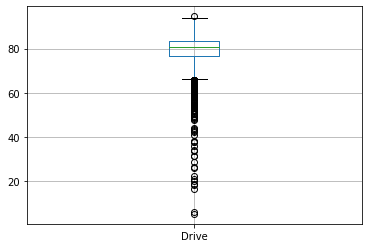

In [ ]:
import matplotlib.pyplot as plt
countyTransCleaned.boxplot(column='Drive')
#plt.semilogy()

In [ ]:
countyTransCleaned['Drive'].describe()

count    3142.000000
mean       79.084278
std         7.663075
min         5.200000
25%        76.600000
50%        80.600000
75%        83.600000
max        94.600000
Name: Drive, dtype: float64

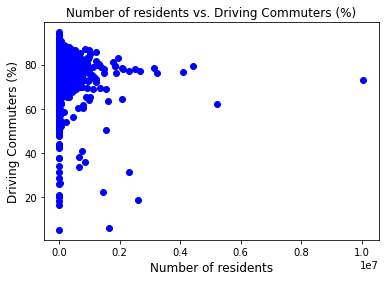

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(countyTransCleaned['Number of residents'], countyTransCleaned['Drive'], color="blue", label="Drive")
plt.xlabel('Number of residents', fontsize=12)
plt.ylabel('Driving Commuters (%)', fontsize=12)
plt.title('Number of residents vs. Driving Commuters (%)')
plt.show()

In [ ]:
# New York counties
countyTransCleanedNy = countyTransCleaned.loc[countyTransCleaned["State Name"] == "New York"]

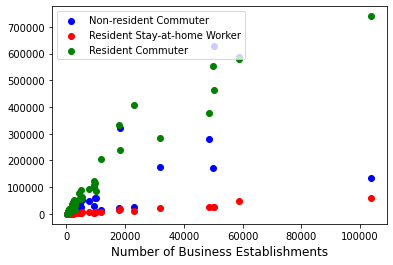

In [ ]:
# scatter plot showing correlation between businesses in county (NY state) and commuter type
import matplotlib.pyplot as plt
plt.scatter(countyTransCleanedNy['Number of business establishments'], countyTransCleanedNy['Number of workers from other counties who commute to work in the county'], color="blue", label="Non-resident Commuter")
plt.scatter(countyTransCleanedNy['Number of business establishments'], countyTransCleanedNy['Number of resident workers who work at home'], color="red", label="Resident Stay-at-home Worker")
plt.scatter(countyTransCleanedNy['Number of business establishments'], countyTransCleanedNy['Number of resident workers who commute within county'], color="green", label="Resident Commuter")
plt.xlabel('Number of Business Establishments', fontsize=12)
plt.ylabel('', fontsize=12)
plt.legend(loc='upper left')
plt.title('')
plt.show()


In [ ]:
countyTransCleanedNyResWorkCommutePercent = countyTransCleanedNy['Number of resident workers who commute to work in other counties']/countyTransCleanedNy['Number of residents']

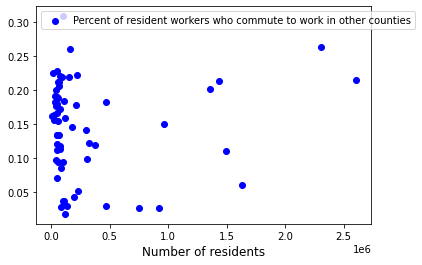

In [ ]:
# satter plot showing correlation between  number of residents in each NY county and the percent of resident workers who commute to work in other counties
import matplotlib.pyplot as plt
plt.scatter(countyTransCleanedNy['Number of residents'], countyTransCleanedNyResWorkCommutePercent, color="blue", label="Percent of resident workers who commute to work in other counties")
plt.xlabel('Number of residents', fontsize=12)
plt.ylabel('', fontsize=12)
plt.legend(loc='upper left')
plt.title('')
plt.show()